In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import preprocessing as prep

# Reading & Merging the Datasets

In [599]:
#read in the first dataset
#first dataset includes player statistics strictly from the 2019-2020 NBA season
df = pd.read_csv("nba_player_stats.csv")
df.head()

,2019-2020 NBA Player Stats | NBAstuffer,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minut...,"USG%Usage RateUsage rate, a.k.a., usage percen...",TO%Turnover RateA metric that estimates the nu...,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound perc...,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an e...,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,VIVersatility IndexVersatility index is a metr...,ORTGOffensive RatingIndividual offensive ratin...,DRTGDefensive RatingIndividual defensive ratin...
1,NaN,Steven Adams,Okc,C,27.07,63,26.7,55.6,17.3,14.4,...,9.3,19.2,2.3,13.2,0.81,1.06,1.51,9.2,122,101.9
2,NaN,Bam Adebayo,Mia,C-F,23.08,72,33.6,69.9,21.2,17.5,...,10.2,17,5.1,24.2,1.14,1.29,2.82,11.2,116.2,102.2
3,NaN,LaMarcus Aldridge,San,F-C,35.07,53,33.1,68.9,23.4,7.8,...,7.4,12,2.4,11.4,0.68,1.64,1.4,8.4,114.7,109.1
4,NaN,Kyle Alexander,Mia,F-C,23.81,2,6.7,14,9.9,33.3,...,1.5,12.5,0,0,0,0,0.5,0,96,108.8


In [600]:
#delete the first column which gives no info
#rename the columns
new_df = df.drop(columns = ['2019-2020 NBA Player Stats | NBAstuffer']).rename(columns = {'Unnamed: 1': 'FULL NAME', 'Unnamed: 2': 'TEAM', 'Unnamed: 3': 'POS', 'Unnamed: 4': 'AGE',
                    'Unnamed: 5': 'GP', 'Unnamed: 6':'MPG', 'Unnamed: 7':'MIN%', 'Unnamed: 8': 'USG%', 'Unnamed: 9': 'TO%',
                    'Unnamed: 10':'FTA', 'Unnamed: 11':'FT%', 'Unnamed: 12':'2PA', 'Unnamed: 13':'2P%', 'Unnamed: 14':'3PA',
                    'Unnamed: 15':'3P%', 'Unnamed: 16':'eFG%', 'Unnamed: 17':'TS%', 'Unnamed: 18': 'PPG', 
                    'Unnamed: 19':'RPG', 'Unnamed: 20': 'TRB%', 'Unnamed: 21':'APG', 'Unnamed: 22':'AST%', 'Unnamed: 23':'SPG',
                    'Unnamed: 24': 'BPG', 'Unnamed: 25':'TOPG', 'Unnamed: 26':'VIVersatility', 'Unnamed: 27':'ORTG', 'Unnamed: 28':'DRTG'})

In [601]:
#check to see if the columns were renamed correctly and if the first column was dropped
new_df.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VIVersatility,ORTG,DRTG
0,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minut...,"USG%Usage RateUsage rate, a.k.a., usage percen...",TO%Turnover RateA metric that estimates the nu...,FTA,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound perc...,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an e...,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,VIVersatility IndexVersatility index is a metr...,ORTGOffensive RatingIndividual offensive ratin...,DRTGDefensive RatingIndividual defensive ratin...
1,Steven Adams,Okc,C,27.07,63,26.7,55.6,17.3,14.4,201,...,9.3,19.2,2.3,13.2,0.81,1.06,1.51,9.2,122,101.9
2,Bam Adebayo,Mia,C-F,23.08,72,33.6,69.9,21.2,17.5,382,...,10.2,17,5.1,24.2,1.14,1.29,2.82,11.2,116.2,102.2
3,LaMarcus Aldridge,San,F-C,35.07,53,33.1,68.9,23.4,7.8,191,...,7.4,12,2.4,11.4,0.68,1.64,1.4,8.4,114.7,109.1
4,Kyle Alexander,Mia,F-C,23.81,2,6.7,14,9.9,33.3,0,...,1.5,12.5,0,0,0,0,0.5,0,96,108.8


In [602]:
#second dataset includes data from 1977 to 2020. This dataset include more advanced statistics
df2 = pd.read_csv("nba_data_historical.csv")
df2.head()

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,...,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,...,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,...,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,...,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,...,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,...,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8


In [603]:
#querying the second dataset because it includes statistics from 1977 to 2020. We only want 2020 statistics so we are 
#querying the data to only include that
df2_q = "year_id == '2020'"
new_df2 = df2.query(df2_q)
new_df2.head()

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,...,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,...,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,...,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,...,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,...,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,...,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8


In [604]:
#merging the two datasets using an inner join and based on the common column of player names
all_data = pd.merge(new_df, new_df2, how = 'inner', left_on = 'FULL NAME', right_on = 'name_common')
all_data

,FULL NAME,TEAM,POS,AGE,GP,MPG_x,MIN%,USG%_x,TO%,FTA,...,STL%,BLK%,ORtg,%Pos,DRtg,2P%_y,3P%_y,FT%_y,3PAr,FTAr
0,Steven Adams,Okc,C,27.07,63,26.7,55.6,17.3,14.4,201,...,1.6,3.5,123.0,19.0,105.8,59.3,33.3,59.0,0.7,41.3
1,Bam Adebayo,Mia,C-F,23.08,72,33.6,69.9,21.2,17.5,382,...,1.7,3.8,117.3,22.3,105.6,57.6,7.7,69.0,1.8,47.6
2,LaMarcus Aldridge,San,F-C,35.07,53,33.1,68.9,23.4,7.8,191,...,1.0,4.4,114.6,22.9,112.5,51.9,38.9,82.7,19.8,24.1
3,Nickeil Alexander-Walker,Nor,G,21.95,47,12.6,26.2,23.3,16.1,37,...,1.0,1.2,90.9,22.7,113.2,33.6,34.2,60.7,51.5,12.3
4,Grayson Allen,Mem,G,24.85,38,18.9,39.4,17.6,10.9,45,...,0.6,0.2,111.1,17.0,114.9,54.1,36.3,85.7,51.7,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Justin Wright-Foreman,Uta,G,22.8,4,11.3,23.5,23.9,12.1,4,...,0.0,0.0,NaN,NaN,117.5,NaN,NaN,NaN,NaN,NaN
626,Thaddeus Young,Chi,F,32.15,64,24.9,51.8,19.7,13.9,72,...,2.8,1.4,100.7,19.6,108.1,50.1,35.6,58.3,36.9,12.0
627,Trae Young,Atl,G,21.9,60,35.3,73.6,34.9,16.2,559,...,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
628,Cody Zeller,Cha,C,27.86,58,23.1,48.2,20.8,11.8,179,...,1.5,1.7,115.8,21.2,111.3,57.7,24.0,68.2,15.7,37.4


# Dropping and Renaming Columns

In [605]:
#checking for data columns to drop
all_data.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG_x', 'MIN%', 'USG%_x',
       'TO%', 'FTA', 'FT%_x', '2PA', '2P%_x', '3PA', '3P%_x', 'eFG%', 'TS%_x',
       'PPG', 'RPG', 'TRB%_x', 'APG', 'AST%_x', 'SPG', 'BPG', 'TOPG',
       'VIVersatility', 'ORTG', 'DRTG', 'player_id', 'name_common', 'year_id',
       'age', 'pos', 'team_id', 'tmRtg', 'franch_id', 'G', 'Min', 'MP%',
       'MPG_y', 'P/36', 'TS%_y', 'A/36', 'R/36', 'SB/36', 'TO/36', 'Raptor O',
       'Raptor D', 'Raptor+/-', 'Raptor WAR', 'PIE%', 'AWS%', 'USG%_y',
       'AST%_y', 'TOV%', 'ORB%', 'DRB%', 'TRB%_y', 'STL%', 'BLK%', 'ORtg',
       '%Pos', 'DRtg', '2P%_y', '3P%_y', 'FT%_y', '3PAr', 'FTAr'],
      dtype='object')

In [606]:
all_new_data = all_data.drop(columns = ['MIN%', 'TO%', 'FTA', 'FT%_x', '2PA', '2P%_x', '3PA', '3P%_x', 'eFG%', 'TRB%_x',
                                       'AST%_x', 'TOPG', 'player_id', 'name_common', 'year_id', 'age', 'pos', 'team_id',
                                       'franch_id', 'G', 'Min', 'MP%', 'MPG_y', 'P/36', 'TS%_y', 'A/36', 'R/36', 'SB/36',
                                       'TO/36', 'AWS%', 'USG%_y', 'AST%_y', 'TOV%', 'ORB%', 
                                       'DRB%', 'TRB%_y', 'STL%', 'BLK%', 'ORTG', 'DRTG','%Pos', '2P%_y', '3P%_y', 
                                       'FT%_y', '3PAr', 'FTAr', 'Raptor WAR'])
#chose to drop these columns because they would not provide value. Many statistics were repeated or will not be used 
#as a predictor for our model

In [607]:
all_new_data.columns
#checking to see if the columns were dropped

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG_x', 'USG%_x', 'TS%_x',
       'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'VIVersatility', 'tmRtg', 'Raptor O',
       'Raptor D', 'Raptor+/-', 'PIE%', 'ORtg', 'DRtg'],
      dtype='object')

In [608]:
all_new_data.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG_x,USG%_x,TS%_x,PPG,RPG,...,SPG,BPG,VIVersatility,tmRtg,Raptor O,Raptor D,Raptor+/-,PIE%,ORtg,DRtg
0,Steven Adams,Okc,C,27.07,63,26.7,17.3,0.604,10.9,9.3,...,0.81,1.06,9.2,2.5,1.0,1.2,2.2,13.9,123.0,105.8
1,Bam Adebayo,Mia,C-F,23.08,72,33.6,21.2,0.597,15.9,10.2,...,1.14,1.29,11.2,3.2,-0.5,2.0,1.5,15.0,117.3,105.6
2,LaMarcus Aldridge,San,F-C,35.07,53,33.1,23.4,0.57,18.9,7.4,...,0.68,1.64,8.4,-1.7,-0.8,0.7,-0.2,12.1,114.6,112.5
3,Nickeil Alexander-Walker,Nor,G,21.95,47,12.6,23.3,0.473,5.7,1.8,...,0.36,0.17,8.5,-0.8,-2.5,-1.9,-4.3,6.1,90.9,113.2
4,Grayson Allen,Mem,G,24.85,38,18.9,17.6,0.609,8.7,2.2,...,0.32,0.05,6.3,-1.0,-0.5,-1.8,-2.3,8.3,111.1,114.9


In [609]:
#renamed columns that had ambiguous names
all_new_data = all_new_data.rename(columns = {'MPG_x': 'MPG', 'USG%_x': 'USG%', 'TS%_x': 'TS%', 'FULL NAME':'Player'})
all_new_data.head()

,Player,TEAM,POS,AGE,GP,MPG,USG%,TS%,PPG,RPG,...,SPG,BPG,VIVersatility,tmRtg,Raptor O,Raptor D,Raptor+/-,PIE%,ORtg,DRtg
0,Steven Adams,Okc,C,27.07,63,26.7,17.3,0.604,10.9,9.3,...,0.81,1.06,9.2,2.5,1.0,1.2,2.2,13.9,123.0,105.8
1,Bam Adebayo,Mia,C-F,23.08,72,33.6,21.2,0.597,15.9,10.2,...,1.14,1.29,11.2,3.2,-0.5,2.0,1.5,15.0,117.3,105.6
2,LaMarcus Aldridge,San,F-C,35.07,53,33.1,23.4,0.57,18.9,7.4,...,0.68,1.64,8.4,-1.7,-0.8,0.7,-0.2,12.1,114.6,112.5
3,Nickeil Alexander-Walker,Nor,G,21.95,47,12.6,23.3,0.473,5.7,1.8,...,0.36,0.17,8.5,-0.8,-2.5,-1.9,-4.3,6.1,90.9,113.2
4,Grayson Allen,Mem,G,24.85,38,18.9,17.6,0.609,8.7,2.2,...,0.32,0.05,6.3,-1.0,-0.5,-1.8,-2.3,8.3,111.1,114.9


# Check For Missing Values

In [610]:
#check for missing values
all_new_data.isnull().sum()
#There are two missing vaues for TS% and 3 missing vaues for ORtg

Player           0
TEAM             0
POS              0
AGE              0
GP               0
MPG              0
USG%             0
TS%              2
PPG              0
RPG              0
APG              0
SPG              0
BPG              0
VIVersatility    0
tmRtg            0
Raptor O         0
Raptor D         0
Raptor+/-        0
PIE%             0
ORtg             3
DRtg             0
dtype: int64

In [611]:
#check to see column data types
all_new_data.dtypes
#need to change numerical columns to a numerical data type

Player            object
TEAM              object
POS               object
AGE               object
GP                object
MPG               object
USG%              object
TS%               object
PPG               object
RPG               object
APG               object
SPG               object
BPG               object
VIVersatility     object
tmRtg            float64
Raptor O         float64
Raptor D         float64
Raptor+/-        float64
PIE%             float64
ORtg             float64
DRtg             float64
dtype: object

In [612]:
#change the column data types to numeric values
convert = {'AGE':float, 'GP':int, 'MPG':float, 'USG%':float, 'TS%':float, 'PPG':float, 'RPG':float, 'APG':float, 'SPG':float,
          'BPG':float, 'VIVersatility':float}
all_new_data = all_new_data.astype(convert)

In [613]:
all_new_data.dtypes

Player            object
TEAM              object
POS               object
AGE              float64
GP                 int32
MPG              float64
USG%             float64
TS%              float64
PPG              float64
RPG              float64
APG              float64
SPG              float64
BPG              float64
VIVersatility    float64
tmRtg            float64
Raptor O         float64
Raptor D         float64
Raptor+/-        float64
PIE%             float64
ORtg             float64
DRtg             float64
dtype: object

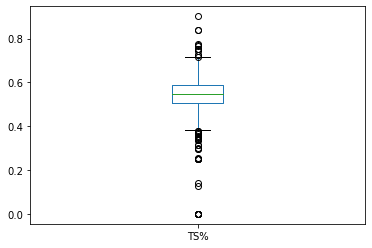

In [614]:
#deciding whether to impute based on mean or median using a boxplot and determining if there are outliers that would
#skew the data
all_new_data['TS%'].plot.box()
#we are able to impute missing values based on the mean for this column because there are outliers both below the minimum
#and above the maximum

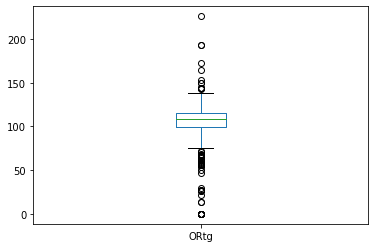

In [615]:
all_new_data['ORtg'].plot.box()
#we are able to impute missing values based on the mean for this column because there are outliers both below the minimum
#and above the maximum

In [616]:
#imputing the missing data based on mean
all_new_data['TS%'].fillna(all_new_data['TS%'].mean(), inplace = True)
all_new_data['ORtg'].fillna(all_new_data['ORtg'].mean(), inplace = True)

In [617]:
#check if missing values were imputed
all_new_data.isnull().sum()

Player           0
TEAM             0
POS              0
AGE              0
GP               0
MPG              0
USG%             0
TS%              0
PPG              0
RPG              0
APG              0
SPG              0
BPG              0
VIVersatility    0
tmRtg            0
Raptor O         0
Raptor D         0
Raptor+/-        0
PIE%             0
ORtg             0
DRtg             0
dtype: int64

# Check For Outliers

In [618]:
#can only check outliers for numeric variables
all_new_data.dtypes

Player            object
TEAM              object
POS               object
AGE              float64
GP                 int32
MPG              float64
USG%             float64
TS%              float64
PPG              float64
RPG              float64
APG              float64
SPG              float64
BPG              float64
VIVersatility    float64
tmRtg            float64
Raptor O         float64
Raptor D         float64
Raptor+/-        float64
PIE%             float64
ORtg             float64
DRtg             float64
dtype: object

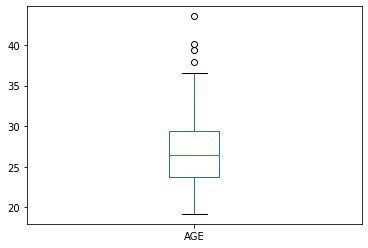

In [619]:
#AGE column
all_new_data['AGE'].plot.box()

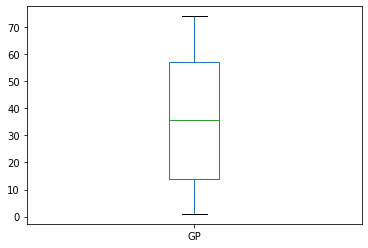

In [620]:
#GP column
all_new_data['GP'].plot.box()

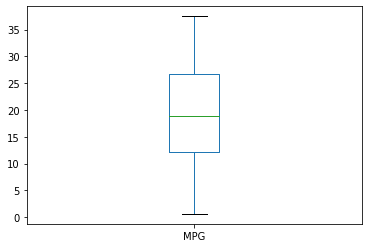

In [621]:
#MPG column
all_new_data['MPG'].plot.box()

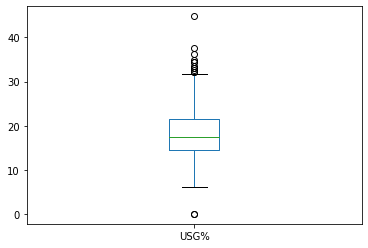

In [622]:
#USG% column
all_new_data['USG%'].plot.box()

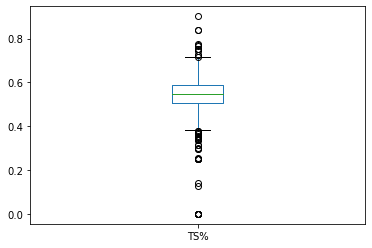

In [623]:
#TS% Column
all_new_data['TS%'].plot.box()

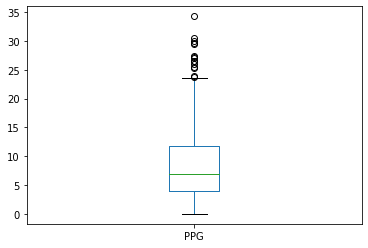

In [624]:
#PPG Column
all_new_data['PPG'].plot.box()

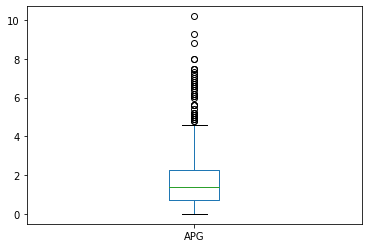

In [625]:
#APG Column
all_new_data['APG'].plot.box()

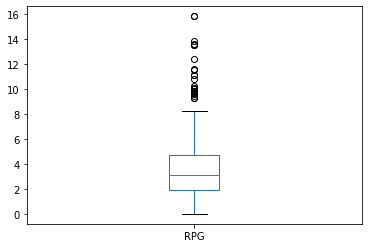

In [626]:
#RPG Column
all_new_data['RPG'].plot.box()

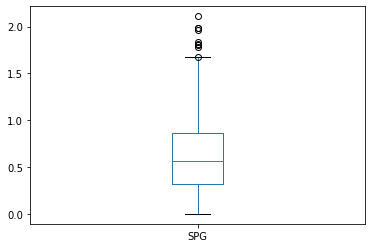

In [627]:
#SPG Column
all_new_data['SPG'].plot.box()

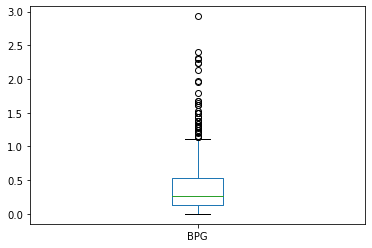

In [628]:
#BPG Column
all_new_data['BPG'].plot.box()

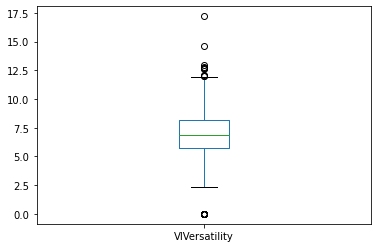

In [629]:
#VIVersatility Column
all_new_data['VIVersatility'].plot.box()

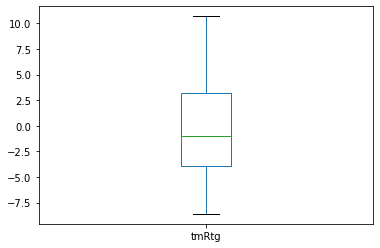

In [630]:
#tmRtg Column
all_new_data['tmRtg'].plot.box()

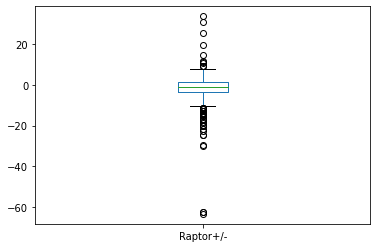

In [631]:
#Raptor +/- Column
all_new_data['Raptor+/-'].plot.box()

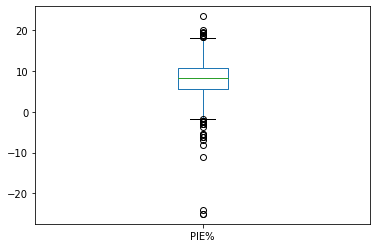

In [632]:
#PIE% Column
all_new_data['PIE%'].plot.box()

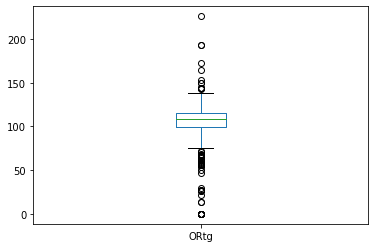

In [633]:
#ORtg column
all_new_data['ORtg'].plot.box()

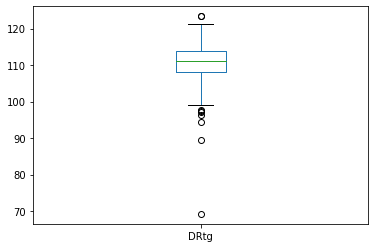

In [634]:
#DRtg
all_new_data['DRtg'].plot.box()

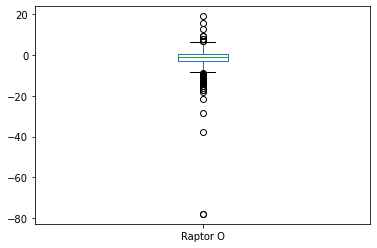

In [635]:
all_new_data['Raptor O'].plot.box()

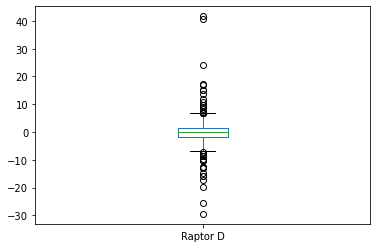

In [636]:
all_new_data['Raptor D'].plot.box()

### Choosing not to drop any outliers because it makes sense for there to be outliers below the minimum and beyond the maximum. There is a large discrepancy between players in the NBA. Those outliers that are below the minimum are likely the players who are not that good and don't accumulate high stats. The outliers that are beyond the maximum are likely star players who generate most of the statistics for their team. Dropping outliers would heavily change the distribution. 

# Visualizing, Transforming, and Scaling the Data

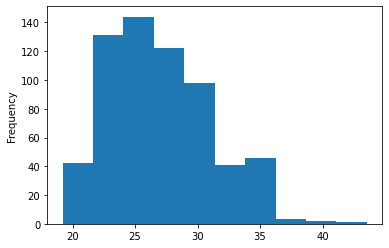

In [637]:
#AGE Column
all_new_data['AGE'].plot.hist()

In [638]:
#minx/max for AGE
print(all_new_data['AGE'].min())
print(all_new_data['AGE'].max())

19.2
43.55


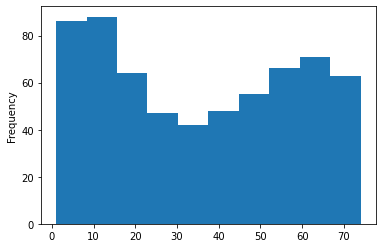

In [639]:
#GP Column
all_new_data['GP'].plot.hist()

In [640]:
#min/max for GP
print(all_new_data['GP'].min())
print(all_new_data['GP'].max())

1
74


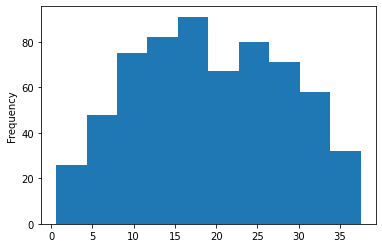

In [641]:
#MPG Column
all_new_data['MPG'].plot.hist()

In [642]:
#min/max for MPG
print(all_new_data['MPG'].min())
print(all_new_data['MPG'].max())

0.6
37.5


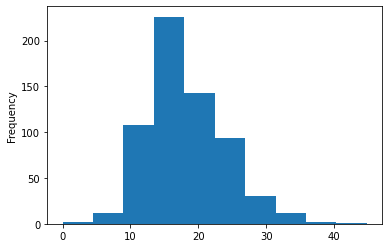

In [643]:
#USG% Column
all_new_data['USG%'].plot.hist()

In [644]:
#min/max for USG%
print(all_new_data['USG%'].min())
print(all_new_data['USG%'].max())

0.0
44.8


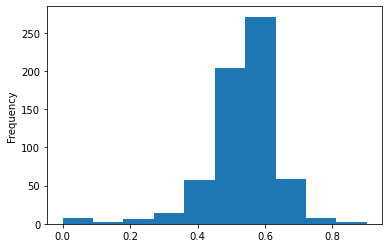

In [645]:
#TS% Column
all_new_data['TS%'].plot.hist()

In [646]:
#min/max for TS%
print(all_new_data['TS%'].min())
print(all_new_data['TS%'].max())

0.0
0.902


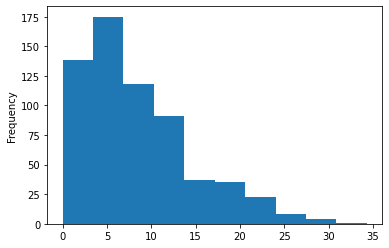

In [647]:
#PPG Column
all_new_data['PPG'].plot.hist()

In [648]:
#min/max for PPG
print(all_new_data['PPG'].min())
print(all_new_data['PPG'].max())

0.0
34.3


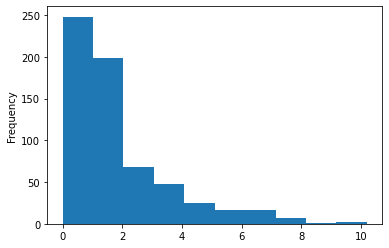

In [649]:
#APG Column
all_new_data['APG'].plot.hist()

In [650]:
#min/max for APG
print(all_new_data['APG'].min())
print(all_new_data['APG'].max())

0.0
10.2


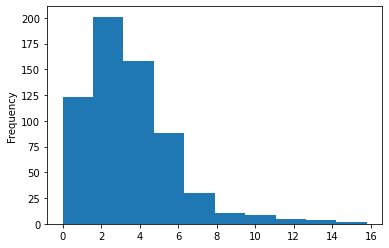

In [651]:
#RPG Column
all_new_data['RPG'].plot.hist()

In [652]:
#min/max for RPG
print(all_new_data['RPG'].min())
print(all_new_data['RPG'].max())

0.0
15.8


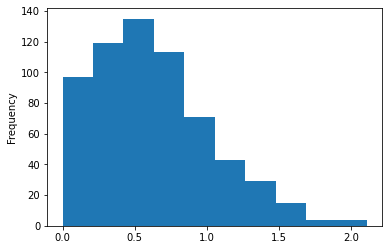

In [653]:
#SPG Column
all_new_data['SPG'].plot.hist()

In [654]:
#min/max for SPG
print(all_new_data['SPG'].min())
print(all_new_data['SPG'].max())

0.0
2.11


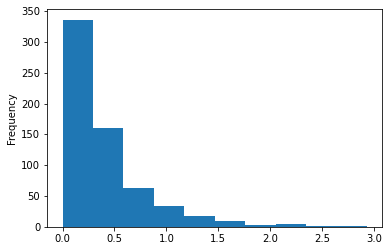

In [655]:
#BPG Column
all_new_data['BPG'].plot.hist()

In [656]:
#min/max for BPG
print(all_new_data['BPG'].min())
print(all_new_data['BPG'].max())

0.0
2.93


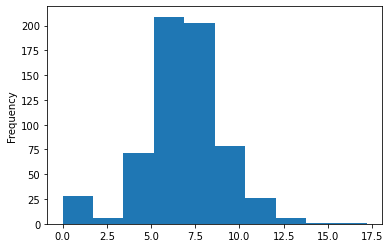

In [657]:
#VIVersatility Column
all_new_data['VIVersatility'].plot.hist()

In [658]:
#min/max for VIVersatility
print(all_new_data['VIVersatility'].min())
print(all_new_data['VIVersatility'].max())

0.0
17.2


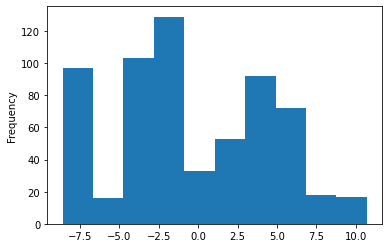

In [659]:
#tmRtg Column
all_new_data['tmRtg'].plot.hist()

In [660]:
#min/max for tmRtg
print(all_new_data['tmRtg'].min())
print(all_new_data['tmRtg'].max())

-8.6
10.7


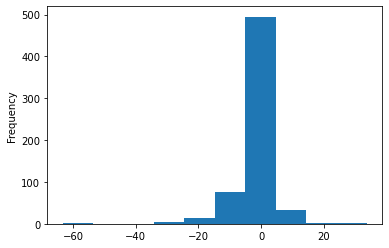

In [661]:
#Raptor+/- Column
all_new_data['Raptor+/-'].plot.hist()

In [662]:
#min/max for Raptor+/-
print(all_new_data['Raptor+/-'].min())
print(all_new_data['Raptor+/-'].max())

-63.4
33.8


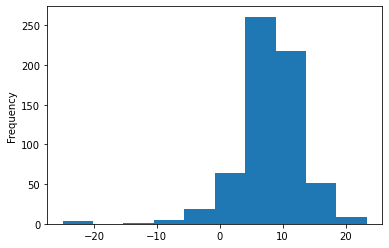

In [663]:
#PIE% Column
all_new_data['PIE%'].plot.hist()

In [664]:
#min/max for PIE%
print(all_new_data['PIE%'].min())
print(all_new_data['PIE%'].max())

-25.0
23.4


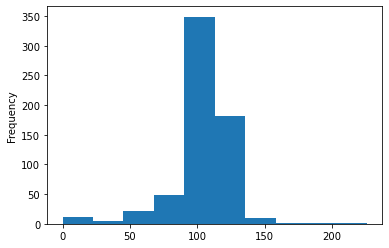

In [665]:
#ORtg Column
all_new_data['ORtg'].plot.hist()

In [666]:
#min/max for ORtg
print(all_new_data['ORtg'].min())
print(all_new_data['ORtg'].max())

0.0
226.0


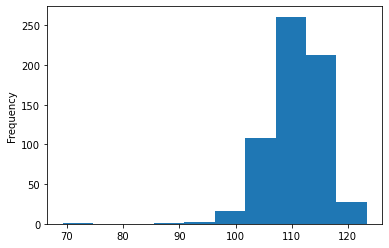

In [667]:
#DRtg Column
all_new_data['DRtg'].plot.hist()

In [668]:
#min/max for DRtg
print(all_new_data['DRtg'].min())
print(all_new_data['DRtg'].max())

69.2
123.4


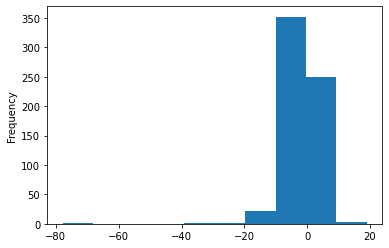

In [669]:
#Raptor O Column
all_new_data['Raptor O'].plot.hist()

In [670]:
#mix/max for Raptor O
print(all_new_data['Raptor O'].min())
print(all_new_data['Raptor O'].max())

-77.9
19.0


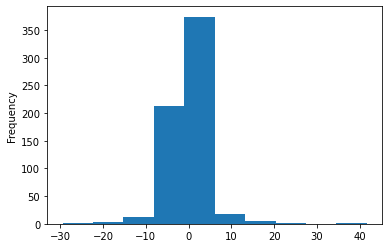

In [671]:
#Raptor D Column
all_new_data['Raptor D'].plot.hist()

In [672]:
#min/max for Raptor D
print(all_new_data['Raptor D'].min())
print(all_new_data['Raptor D'].max())

-29.5
41.7


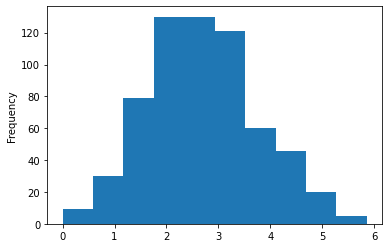

In [673]:
#transforming the PPG column because it is skewed to the right
all_new_data['PPG_transformed'] = all_new_data['PPG'].apply(np.sqrt)
all_new_data['PPG_transformed'].plot.hist()

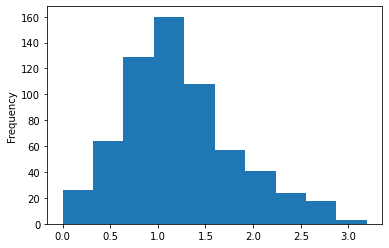

In [674]:
#transforming the APG column because it is skewed to the right
all_new_data['APG_transformed'] = all_new_data['APG'].apply(np.sqrt)
all_new_data['APG_transformed'].plot.hist()

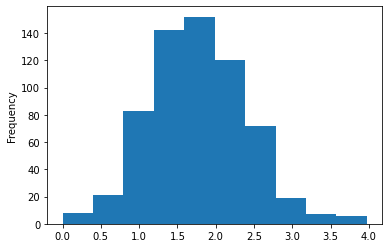

In [675]:
#transforming the RPG column because it is skewed to the right
all_new_data['RPG_transformed'] = all_new_data['RPG'].apply(np.sqrt)
all_new_data['RPG_transformed'].plot.hist()

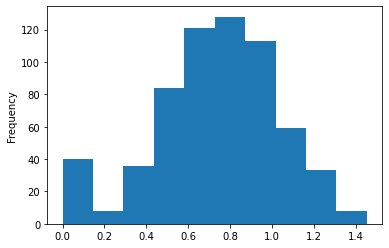

In [676]:
#transforming the SPG column because it is skewed to the right
all_new_data['SPG_transformed'] = all_new_data['SPG'].apply(np.sqrt)
all_new_data['SPG_transformed'].plot.hist()

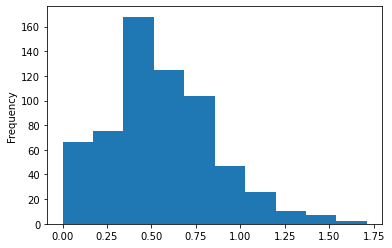

In [677]:
#transforming the BPG column because it is skewed to the right
all_new_data['BPG_transformed'] = all_new_data['BPG'].apply(np.sqrt)
all_new_data['BPG_transformed'].plot.hist()

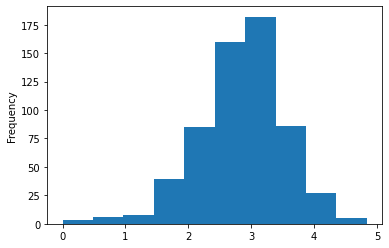

In [678]:
#transforming the PIE% column because it is skewed to the left
all_new_data['PIE%_transformed'] = all_new_data['PIE%'].apply(np.sqrt)
all_new_data['PIE%_transformed'].plot.hist()

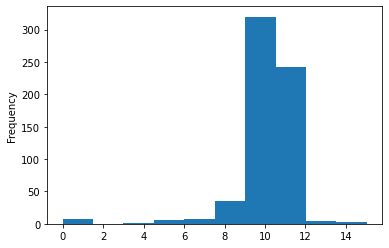

In [679]:
#transforming the ORtg column because it is skewed to the left
all_new_data['ORtg_transformed'] = all_new_data['ORtg'].apply(np.sqrt)
all_new_data['ORtg_transformed'].plot.hist()

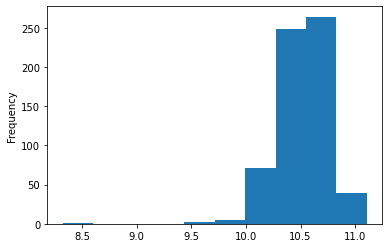

In [680]:
#transforming the DRtg column because it is skewed to the left
all_new_data['DRtg_transformed'] = all_new_data['DRtg'].apply(np.sqrt)
all_new_data['DRtg_transformed'].plot.hist()

In [681]:
all_new_data.isnull().sum()

Player               0
TEAM                 0
POS                  0
AGE                  0
GP                   0
MPG                  0
USG%                 0
TS%                  0
PPG                  0
RPG                  0
APG                  0
SPG                  0
BPG                  0
VIVersatility        0
tmRtg                0
Raptor O             0
Raptor D             0
Raptor+/-            0
PIE%                 0
ORtg                 0
DRtg                 0
PPG_transformed      0
APG_transformed      0
RPG_transformed      0
SPG_transformed      0
BPG_transformed      0
PIE%_transformed    29
ORtg_transformed     0
DRtg_transformed     0
dtype: int64

In [682]:
all_new_data['PIE%_transformed'].fillna(all_new_data['PIE%_transformed'].mean(), inplace = True)
#chose to impute PIE%_transformed by the mean because there are outliers below the minimum and beyond the maximum

In [683]:
all_new_data.isnull().sum()

Player              0
TEAM                0
POS                 0
AGE                 0
GP                  0
MPG                 0
USG%                0
TS%                 0
PPG                 0
RPG                 0
APG                 0
SPG                 0
BPG                 0
VIVersatility       0
tmRtg               0
Raptor O            0
Raptor D            0
Raptor+/-           0
PIE%                0
ORtg                0
DRtg                0
PPG_transformed     0
APG_transformed     0
RPG_transformed     0
SPG_transformed     0
BPG_transformed     0
PIE%_transformed    0
ORtg_transformed    0
DRtg_transformed    0
dtype: int64

# Create the Model

## Linear Regression with Individual-Driven Statistics

In [684]:
lm = LinearRegression()
x = all_new_data[['PPG_transformed', 'USG%', 'TS%', 'PIE%_transformed', 'VIVersatility', 'ORtg_transformed', 'Raptor O']]
y = all_new_data['Raptor+/-']
lm.fit(x, y)

LinearRegression()

In [685]:
r_squared = lm.score(x, y)
print('Coefficient of determination: ', r_squared)

Coefficient of determination:  0.5732435446441481


In [686]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(x)
regression_model_mse = mean_squared_error(y_predict, y)
math.sqrt(regression_model_mse)

4.5941426347018375

## Linear Regression with Team-Driven Non-Scoring Statistics

In [687]:
lm = LinearRegression()
x = all_new_data[['APG_transformed', 'RPG_transformed', 'BPG_transformed', 'SPG_transformed', 'DRtg_transformed', 'Raptor D']]
y = all_new_data['Raptor+/-']
lm.fit(x, y)

LinearRegression()

In [688]:
r_squared = lm.score(x, y)
print('Coefficient of determination: ', r_squared)

Coefficient of determination:  0.3697621064951383


In [689]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(x)
regression_model_mse = mean_squared_error(y_predict, y)
math.sqrt(regression_model_mse)

5.582987827669979

## Linear Regression with Box-Score Statistics

In [690]:
lm = LinearRegression()
x = all_new_data[['PPG_transformed', 'APG_transformed', 'RPG_transformed', 'BPG_transformed', 'SPG_transformed', 'MPG']]
y = all_new_data['Raptor+/-']
lm.fit(x, y)

LinearRegression()

In [691]:
r_squared = lm.score(x, y)
print('Coefficient of determination: ', r_squared)

Coefficient of determination:  0.12825762057613177


In [692]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(x)
regression_model_mse = mean_squared_error(y_predict, y)
math.sqrt(regression_model_mse)

6.566115303144572

## Linear Regression with Advanced Statistics

In [693]:
lm = LinearRegression()
x = all_new_data[['USG%', 'TS%', 'VIVersatility', 'tmRtg', 'PIE%_transformed', 'ORtg_transformed', 'DRtg_transformed', 
                  'Raptor O','Raptor D']]
y = all_new_data['Raptor+/-']
lm.fit(x, y)

LinearRegression()

In [694]:
r_squared = lm.score(x, y)
print('Coefficient of determination: ', r_squared)

Coefficient of determination:  0.9999502357202907


In [695]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(x)
regression_model_mse = mean_squared_error(y_predict, y)
math.sqrt(regression_model_mse)

0.04961046369229128